In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Data Science Framework
* **Define the Problem.** 
* **Gather Data**
* **Prepare Data for Consumptipon** clean data, from raw data to manageable.
* **Perform Exploratory Analysis**, explore, understand, look for patterns, problems, classifications, correlations, comparisions. 
* **Model Data** ML algorithms to learn the data
* **Validate&Implement Data Model** 
* **Optimize**

## Problem
Using the Passenger information to predict their survival in the Titanic tragedy .

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn

In [3]:
# load the training set and evaluation data set. 
data_raw = pd.read_csv("./data/train.csv")
data_val = pd.read_csv("./data/test.csv")

In [5]:
# before start to manipulate the original data, deep copy and play on the new dataframe. 
data1 = data_raw.copy(deep=True)

In [17]:
print("Features: ", data1.columns)
print("Number of passangers and properties: ", data1.shape)

Features:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Number of passangers and properties:  (891, 12)


PassengerId => 乘客ID

Survived => 是否存活

Pclass => 乘客等级(1/2/3等舱位)

Name => 乘客姓名

Sex => 性别

Age => 年龄

SibSp => 堂兄弟/妹个数

Parch => 父母与小孩个数

Ticket => 船票信息

Fare => 票价

Cabin => 客舱

Embarked => 登船港口

In [20]:
print("Features: ", data_val.columns)
print("Number of passangers and properties: ", data_val.shape)

Features:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Number of passangers and properties:  (418, 11)


There are in total *12* features for each passanger and *891* passanger information available in training data.
*Survived* is a binary code to indicate if the passanger survived. This is the target to be predicted for test dataset. 
But for now, the target doesnt need to be separated, since many operations needed to clean the data first. Do this at last. 

The data_val is the dataset we need to predict survival on. The transformation done on the train dataset better apply on the evaluation dataset too, to achieve same behavior. 

In [22]:
data_clean = [data1, data_val]

In [18]:
data1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


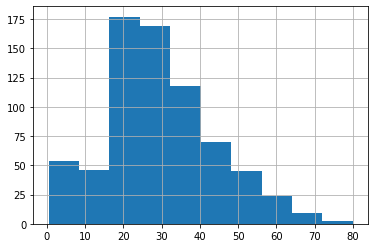

In [38]:
data1.describe(include = "all")
data1.Age.hist()

The data column are both numerical and object, some need to be transferred, like the Survived, it should be a boolean.
There are also lots of missing values(null) in many columns. Explore this later.

In [24]:
print(data1.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [27]:
print(data_val.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Data cleaning: Correcting, Completing, Creating, Converting
* Correcting: outlier, abnormal data, incorrect data type, .etc
* Completing: missing value, null value, .etc, usually using meadian, mean, mode(which count the frequency, return the most frequent one)
* Creating: generate new features from the exsting feature.
* Converting: datatype formatting, like Data, currency, Boolean, objects, .etc.

When making any change to the dataset, compare the result with the original dataset to see if the change worth it. if there is improvement. 
Backup the data, do not make change on the original data.

There are many missing value for Cabin 687/891, it may not be usable.
The passangerId and Ticket are just random numbers, they should not affect the survival. 
All three columns can be removed from the dataset. 

In [26]:
# Drop the not useful columns
drop_columns = ["Cabin", "Ticket", "PassengerId"]
for col in drop_columns:
    if(col in data1):
        data1.drop(col, inplace=True, axis = 1)
print(data1.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [40]:
# fill the null/missing values for the remain columns,
# for the age, fill na with median value
# for the Embarked, fill na with the most comman value
# for the Fare, using the median value again. 
# Do this for the data1 and data_val, to keep the dataset consistance. 
for dataset in data_clean:
    dataset["Age"].fillna(dataset["Age"].median(), inplace = True)
    # Embarked are place names, no arithmetical operation allowed. 
    # mode function counts the unique value frequency, take the most common value. 
    dataset["Embarked"].fillna(dataset["Embarked"].mode()[0], inplace = True)
    
    dataset["Fare"].fillna(dataset["Fare"].median(), inplace = True)


In [42]:
print(data1.isnull().sum())
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


Now try to engineer some new features from the existing feature.
1. Family size, how many members are on the cruise. 
2. If the passenger is alone
3. Title, Mr, Miss, .etc. 
4. Cut age to groups instead of a number 
Here just to show how feature engineering works, not every new feature make sence. 

In [86]:
for dataset in data_clean:
    # add the siblings on board with the 
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1;
    dataset["Alone"] = 1
    dataset["Alone"].loc[dataset["FamilySize"] > 1] = 0
    dataset["Title"] = dataset["Name"].str.split(", ", expand = True)[1].str.split(".", expand = True)[0]
    dataset["FareBin"] = pd.qcut(dataset["Fare"], 4)  # equal cut, every group has same number of elements
    dataset["AgeBin"] = pd.cut(dataset["Age"].astype(int), 4) # the span of each group is same, not equal number of elements.

/Users/shaohuichen/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [87]:
min_num_title = 10
print(data1["Title"].mode())
title_names = (data1['Title'].value_counts() < min_num_title) #this will create a true false series with title name as index
print(title_names)
print(title_names.loc["Mr"])
data1["Title"] = data1["Title"].apply(lambda x: "Misc" if title_names.loc[x] == True else x)

0    Mr
dtype: object
Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Col              True
Major            True
Mlle             True
Jonkheer         True
Sir              True
Ms               True
Lady             True
the Countess     True
Capt             True
Mme              True
Don              True
Name: Title, dtype: bool
False


In [88]:
data1["Title"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

Encode the labels to numerical value.
Using LabelEncoder from sklearn.preprocess

In [89]:
from sklearn.preprocessing import LabelEncoder
label_transfer = LabelEncoder()
data1["Sex_Code"] = label_transfer.fit_transform(data1["Sex"])
data1["Embarked_Code"] = label_transfer.fit_transform(data1["Embarked"])
data1["Title_Code"] = label_transfer.fit_transform(data1["Title"])
data1["AgeBin_Code"] = label_transfer.fit_transform(data1["AgeBin"])
data1["FareBin_Code"] = label_transfer.fit_transform(data1["FareBin"])

In [90]:
data1["Embarked_Code"].value_counts()

2    646
0    168
1     77
Name: Embarked_Code, dtype: int64

In [91]:
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')


Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



KeyError: "['IsAlone'] not in index"